# Food consumption

## Jako były kucharz i osoba siedząca w tematach jedzenia i wina w tym notebooku zajmę się analizą bazy danych z WHO na temat konsumpcji jedzenia na świecie czyli preferencji jedzeniowych, różnic między krajami, kobietami i mężczyznami. Myślę że bardzo ciekawe informacje tutaj wyciągnę i będzie można sie dowiedzieć dużo. coś jeszcze? 
### Najpierw sprawdzę:
1. jak baza danych jest skonstruowana, jakie zawiera informacje, jakie typy danych sie w niej znajdują, czy są puste dane wiec już na pierwszym kroku będzie ciekawie
1. następnie jakie poroblemy w mogą w niej wystąpić i co należy wyczyścić żeby móc z niej wygodnie korzystać 
1. pozbyć sie niepotrzebnych danych
1. kolejnym krokiem będzie znajdowanie potrzebnych danych oraz może znalezienie nowych ciekawych
1. a ostatecznie wizualizaja tych danych zeby łatwo móc widzieć tendencje które zaszly
1. I ostatni krok czyli podsumowanie, tutaj wyciągnę wnioski, 
1. co jeszcze?
1. czy bede robić to na wszystkich krajach czy wybiore konkretne?
1. jakie problemy napotkałem
1. do argumentacji można użyć tego badania https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3490048/


In [1158]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import pycountry_convert as pc
plt.style.use('fivethirtyeight')

In [1159]:
food=pd.read_csv("fullcifocoss.csv", on_bad_lines='skip', sep=';', skipinitialspace = True)
pd.set_option('display.max_columns', None) # sprawiam że można przejżeć wszystkie columny ponieważ deafaultowo jest ograniczona ilość wyświetlanych kolumn
food.head(19)

,BW,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Consumers_Mean,Consumers_Median,Consumers_P05,Consumers_P90,Consumers_P95,Consumers_P975,Consumers_Standard_deviation,Number_of_subjects,Total_Mean,Total_Median,Total_P05,Total_P90,Total_P95,Total_P975,Total_Standard_deviation,ExtBW,ExtBWValue
0,0,China,2002,A000G,Oat grain,All,All,All,1157,60.62,0.00,8.33,116.67,150.00,166.67,NaN,66172,1.06,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
1,0,China,2002,A000G,Oat grain,All,All,female,608,55.87,0.00,8.33,116.67,133.33,158.33,NaN,33953,1.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
2,0,China,2002,A000G,Oat grain,All,All,male,549,65.89,0.00,10.00,133.33,158.33,166.67,NaN,32219,1.12,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
3,0,China,2002,A000N,Buckwheat,All,All,All,167,55.26,0.00,8.33,100.00,116.67,158.33,NaN,66172,0.14,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
4,0,China,2002,A000N,Buckwheat,All,All,female,82,54.71,0.00,8.33,83.33,116.67,183.33,NaN,33953,0.13,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
5,0,China,2002,A000N,Buckwheat,All,All,male,85,55.80,0.00,8.33,100.00,116.67,133.33,NaN,32219,0.15,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
6,0,China,2002,A000P,Barley grains,All,All,All,61,38.58,0.00,6.67,66.67,83.33,116.67,NaN,66172,NaN,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
7,0,China,2002,A000P,Barley grains,All,All,female,28,37.50,0.00,3.33,66.67,83.33,100.00,NaN,33953,NaN,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
8,0,China,2002,A000P,Barley grains,All,All,male,33,39.49,0.00,8.33,83.33,116.67,166.67,NaN,32219,NaN,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
9,0,China,2002,A000T,Maize grain,All,All,All,2422,86.97,0.00,8.33,183.33,358.33,500.00,NaN,66172,3.18,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN


### ustawię jeszcze żeby na pewno wszystkie liczby miały 2 liczby po przecinku bo wolę taki wygląd a wrazie potrzeb zawsze mogę wrócić do deafaultowych ustawień

In [1160]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
food.head()

,BW,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Consumers_Mean,Consumers_Median,Consumers_P05,Consumers_P90,Consumers_P95,Consumers_P975,Consumers_Standard_deviation,Number_of_subjects,Total_Mean,Total_Median,Total_P05,Total_P90,Total_P95,Total_P975,Total_Standard_deviation,ExtBW,ExtBWValue
0,0,China,2002,A000G,Oat grain,All,All,All,1157,60.62,0.00,8.33,116.67,150.00,166.67,NaN,66172,1.06,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
1,0,China,2002,A000G,Oat grain,All,All,female,608,55.87,0.00,8.33,116.67,133.33,158.33,NaN,33953,1.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
2,0,China,2002,A000G,Oat grain,All,All,male,549,65.89,0.00,10.00,133.33,158.33,166.67,NaN,32219,1.12,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
3,0,China,2002,A000N,Buckwheat,All,All,All,167,55.26,0.00,8.33,100.00,116.67,158.33,NaN,66172,0.14,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
4,0,China,2002,A000N,Buckwheat,All,All,female,82,54.71,0.00,8.33,83.33,116.67,183.33,NaN,33953,0.13,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN


### usuwam duplikaty

In [1161]:
food.shape

(544686, 26)

In [1162]:
food = food.drop_duplicates()

In [1163]:
food.shape

(544686, 26)

In [1164]:
544686-523276 

21410

### pozbyliśmy się 21410 duplikatów

### Dla ułatwienia przeglądania dataframe usuwam te kolumny które na pewno nie będą potrzebne

In [1165]:
food.drop(columns=food.loc[:, 'Consumers_P05':'Consumers_Standard_deviation'], inplace=True)
food.drop(columns=food.loc[:, 'Total_P05':'ExtBWValue'], inplace=True)
food = food.drop(['BW'], axis=1)
food.head(10)

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Consumers_Mean,Consumers_Median,Number_of_subjects,Total_Mean,Total_Median
0,China,2002,A000G,Oat grain,All,All,All,1157,60.62,0.00,66172,1.06,0.00
1,China,2002,A000G,Oat grain,All,All,female,608,55.87,0.00,33953,1.00,0.00
2,China,2002,A000G,Oat grain,All,All,male,549,65.89,0.00,32219,1.12,0.00
3,China,2002,A000N,Buckwheat,All,All,All,167,55.26,0.00,66172,0.14,0.00
4,China,2002,A000N,Buckwheat,All,All,female,82,54.71,0.00,33953,0.13,0.00
5,China,2002,A000N,Buckwheat,All,All,male,85,55.80,0.00,32219,0.15,0.00
6,China,2002,A000P,Barley grains,All,All,All,61,38.58,0.00,66172,NaN,0.00
7,China,2002,A000P,Barley grains,All,All,female,28,37.50,0.00,33953,NaN,0.00
8,China,2002,A000P,Barley grains,All,All,male,33,39.49,0.00,32219,NaN,0.00
9,China,2002,A000T,Maize grain,All,All,All,2422,86.97,0.00,66172,3.18,0.00


In [1166]:
food.shape

(544686, 13)

<Axes: >

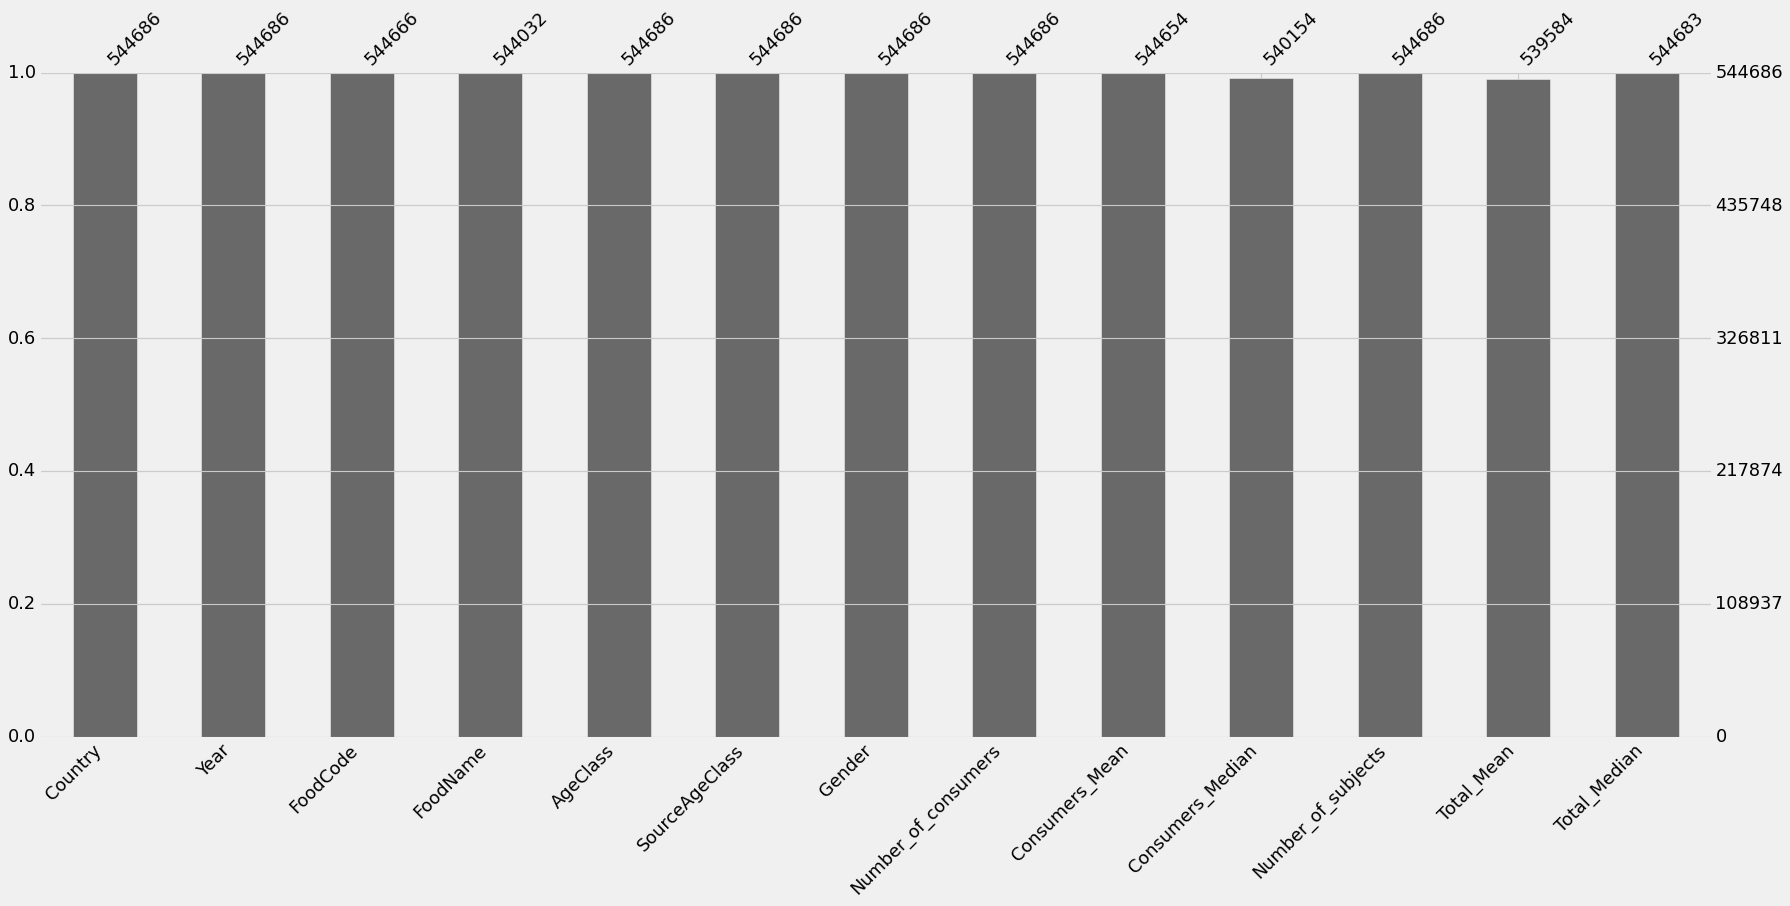

In [1167]:
msno.bar(food)

In [1168]:
food.isna().sum()

Country                   0
Year                      0
FoodCode                 20
FoodName                654
AgeClass                  0
SourceAgeClass            0
Gender                    0
Number_of_consumers       0
Consumers_Mean           32
Consumers_Median       4532
Number_of_subjects        0
Total_Mean             5102
Total_Median              3
dtype: int64

### zarówno na wykresie jak i w tabeli widać że FoodName i FoodCode mają puste wartości (na razie nie zajmujemy sie innymi koumnami z pustymi watościami bo nie wiedomo czy będą użyteczne) wiec zajmujemy sie usunięciem tych rzędów 

In [1169]:
null_data = food[food.isnull().any(axis=1)]
null_data.tail() # NaN w FoodCode widać dopiero na 50 ale dla wygody pozostaje default

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Consumers_Mean,Consumers_Median,Number_of_subjects,Total_Mean,Total_Median
540608,Republic of Korea,2015,fa6adbfab52e8a77f23df411f59c2150,NaN,Children and Adolescents,3-5 years,All,692,2.26,0.84,804,1.95,0.59
540609,Republic of Korea,2015,fa6adbfab52e8a77f23df411f59c2150,NaN,Children and Adolescents,6-14 years,All,1937,1.89,0.81,2376,1.54,0.48
540610,Republic of Korea,2015,fa6adbfab52e8a77f23df411f59c2150,NaN,Adults and Elderly,15-49 years,All,6798,1.80,0.76,8253,1.48,0.48
540611,Republic of Korea,2015,fa6adbfab52e8a77f23df411f59c2150,NaN,Adults and Elderly,50-74 years,All,6054,2.04,0.76,7069,1.74,0.49
540612,Republic of Korea,2015,fa6adbfab52e8a77f23df411f59c2150,NaN,Adults and Elderly,>75 years,All,1204,1.97,0.40,1650,1.44,0.11


In [1170]:
food.iloc[527543]

Country                Democratic Republic of the Congo
Year                                               2016
FoodCode                                            NaN
FoodName                                            NaN
AgeClass                             Adults and Elderly
SourceAgeClass                              15-49 years
Gender                                              All
Number_of_consumers                                   1
Consumers_Mean                                     3.36
Consumers_Median                                   3.36
Number_of_subjects                                  214
Total_Mean                                         0.02
Total_Median                                       0.00
Name: 527543, dtype: object

### tutaj widzimy że FoodName i FoodCode puste dane są opisane jako NaN, dodatkowo jest jeszcze długi kod który jest taki sam w każdym rzędzie, także usunę FoodName i zobaczę czy nadal te kody pozostały jeżeli one nie opisują żadnego produktu to one także zostaną usunięte. prawdopodobnie własnie z powodu błędnego kodu produktu nie ma nazwy produktu

In [1171]:
food = food.dropna(subset=['FoodName'])

In [1172]:
food.isna().sum()      

Country                   0
Year                      0
FoodCode                  0
FoodName                  0
AgeClass                  0
SourceAgeClass            0
Gender                    0
Number_of_consumers       0
Consumers_Mean           32
Consumers_Median       4532
Number_of_subjects        0
Total_Mean             5102
Total_Median              3
dtype: int64

### wychodzi że nie ma już pustych danych. poprzez usuwanie pustych danych w FoodName pozbyliśmy sie równiez tych z FoodCode co znaczy żę po części było to tylko zależne.  jednak jeszcze trzeba sprawdzić czy produkty które miały kod fa6adbfab52e8a77f23df411f59c2150 też zostału usunięte wstępnie z tego co widać poprawne kody nie śa dłuższe niz 5 znaków także sprawdzam czy istnieją dłuższe kody w kolumnie FoodCode

In [1173]:
food.loc[food['FoodCode'] == "fa6adbfab52e8a77f23df411f59c2150"]
temp = food['FoodCode'].str.len() > 5
temp.value_counts()

FoodCode
False    537902
True       6130
Name: count, dtype: int64

### wygląda na to że tego konkretnego kodu sie pozbyłem ale kody których dlugoś jest większa od 5 nadal istnieją i pytanie czy one są poprawne czy nie

In [1174]:
checkpoint = food #tworzę checkpoint żeby móc łatwo wrócić do wersji przed sortowaniem
food['CodeLen'] = food['FoodCode'].str.len()
food.sort_values(by=['CodeLen'])

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Consumers_Mean,Consumers_Median,Number_of_subjects,Total_Mean,Total_Median,CodeLen
0,China,2002,A000G,Oat grain,All,All,All,1157,60.62,0.00,66172,1.06,0.00,5
361304,Spain,2004,A01DM,Medlars,Children and Adolescents,Other children,Male,1,0.48,0.48,205,0.00,0.00,5
361303,Spain,2004,A01DJ,Apples,Children and Adolescents,Other children,Male,62,3.53,2.95,205,1.07,0.00,5
361302,Spain,2004,A01DJ,Apples,Children and Adolescents,Other children,Female,76,3.21,2.75,194,1.26,0.00,5
361301,Spain,2004,A01JT,"Kiwi fruits (green, red, yellow)",Children and Adolescents,Other children,Male,8,1.84,1.64,205,0.07,0.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265753,Uganda,2010,17348df7c5044de2950b5bce2d8bb912,(All Meat and meat products),All,All,female,152,59.14,43.12,559,16.08,0.00,32
265752,Uganda,2010,17348df7c5044de2950b5bce2d8bb912,(All Meat and meat products),Children and Adolescents,6-14 years,female,0,0.00,0.00,1,0.00,0.00,32
265751,Uganda,2010,17348df7c5044de2950b5bce2d8bb912,(All Meat and meat products),Adults and Elderly,50-74 years,female,11,56.55,37.35,40,15.55,0.00,32
527245,Bolivia (Plurinational State of),2011,80342da971f1dbf98f4f2d66658e28e6,(All Milk and dairy products),Children and Adolescents,3-5 years,female,3,1.56,1.71,4,1.17,1.06,32


In [1175]:
temp = food.loc[food['FoodCode'] == "a93a0316b93a7c2af9305e90012af119"]
len(temp)

478

### wygląda na to że nie wszystkie kody o dlugości 32 są błędne wiec sama długość nie jest powodem pustych danych
### teraz sprawdzę czy wszystkie grupy wiekowe i ilość consumerów skłądają sie na grupe wiekową All

In [1176]:
food = checkpoint
food_all = food.loc[food['Gender'] == "All"]
food_all = food_all.loc[food_all['FoodName'] == "Oat grain"]
food_all = food_all.loc[food_all['Country'] == "China"]

food_all.head(20)

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Consumers_Mean,Consumers_Median,Number_of_subjects,Total_Mean,Total_Median,CodeLen
0,China,2002,A000G,Oat grain,All,All,All,1157,60.62,0.00,66172,1.06,0.00,5
812,China,2002,A000G,Oat grain,Infants and Toddlers,0-35 months,All,10,28.58,0.00,838,0.34,0.00,5
1251,China,2002,A000G,Oat grain,Children and Adolescents,3-5 years,All,20,22.00,0.00,2235,0.20,0.00,5
1782,China,2002,A000G,Oat grain,Children and Adolescents,6-14 years,All,107,39.97,0.00,9844,0.43,0.00,5
2487,China,2002,A000G,Oat grain,Adults and Elderly,15-49 years,All,545,66.67,0.00,33719,1.08,0.00,5
3267,China,2002,A000G,Oat grain,Adults and Elderly,50-74 years,All,438,62.06,0.00,18143,1.50,0.00,5
4020,China,2002,A000G,Oat grain,Adults and Elderly,>75 years,All,37,43.87,0.00,1393,1.17,0.00,5
279440,China,2002,A000G,Oat grain,All,All,All,1157,1.12,NaN,66172,NaN,0.00,5
280252,China,2002,A000G,Oat grain,Infants and Toddlers,0-35 months,All,10,2.00,NaN,838,NaN,0.00,5
280691,China,2002,A000G,Oat grain,Children and Adolescents,3-5 years,All,20,1.31,NaN,2235,NaN,0.00,5


### już teraz widać ze są problemy. dane się powtarzają ale nie we wszystkich kolumnach. w przypadku all Number_of_consumers i Number_of_subjects jest taki sam ale inne kolumny albo nie maja danych albo maja inne. znaczy to że są tu powielone kolumny i trzeba pozbyć sie tych duplikatów. wygląda na to że najlepszym sposobem byłoby zrobienie tego usuwając rzędy w których jest NaN w Consumers_Median i Total_Mean tylko pytanie czy te kolumny są wiarygodne wiec trzeba sprawdzićczy te liczby są prawdziwe 
### jako że nie ma legendy jak dokładnie są liczone te wartości i co na pewno znaczą samemu spróbuje to zrozumieć a jeżeli nie będą one dawać poprawnych wyników to zostaną usunięte
### consumers mean 

In [1177]:
1157/66172*100 # procent consumerów z całej puli subjectów 

1.748473674666022

In [1178]:
66172/1157

57.19273984442524

In [1179]:
(1.12+66172)/1157

57.193707865168534

In [1180]:
food_all['Consumers_Mean'].iloc[0]

60.623

In [1181]:
food_all['Consumers_Mean'].iloc[1:7].sum()

263.15090000000004

### nawet suma średnich nie daje odpowiedniego wyniku

In [1182]:
food.shape

(544032, 14)

### żadne obliczenia nie daja takiej wartości jaka jest w bazie więc albo są to jakieś inne dane np średnia ilość gramów spożywanego produktu przez ankietowanych albo coś zupełnie innego ale bez odpowiedniej wiedzy nie można tego założyć. Znaczy to ze trzeba sie pozbyć tych kolumn gdyz nawet gdyby pomocne mogą one zawierać fałsyzwe wartości 
### uswam więc: Consumers_Mean, Consumers_Median, Total_Mean, Total_Median i dodatkowo CodeLen które i tak już nie beędzie użyteczne dla mnie

In [1183]:
food = food.drop(['Consumers_Mean', 'Consumers_Median', 'Total_Mean', 'Total_Median', 'CodeLen'], axis=1)
food.shape

(544032, 9)

In [1184]:
food

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects
0,China,2002,A000G,Oat grain,All,All,All,1157,66172
1,China,2002,A000G,Oat grain,All,All,female,608,33953
2,China,2002,A000G,Oat grain,All,All,male,549,32219
3,China,2002,A000N,Buckwheat,All,All,All,167,66172
4,China,2002,A000N,Buckwheat,All,All,female,82,33953
...,...,...,...,...,...,...,...,...,...
544681,Republic of Korea,2015,A16MR,"Juice concentrate, pineapple",Infants and Toddlers,0-35 months,All,0,519
544682,Republic of Korea,2015,A16MR,"Juice concentrate, pineapple",Children and Adolescents,3-5 years,All,0,804
544683,Republic of Korea,2015,A16MR,"Juice concentrate, pineapple",Children and Adolescents,6-14 years,All,0,2376
544684,Republic of Korea,2015,A16MR,"Juice concentrate, pineapple",Adults and Elderly,15-49 years,All,1,8253


### wszystko poszło dobrze, pozbyliśmy sie 5 kolumn wiec teraz czas na usuwanie duplikatów, zrobie to za pomocą drop.duplicates po prostu, powinno to teraz pozbyć sie rzędów w ktorych sa te same dane poniewaz ju nic innego nei powinno powodować tu błędów

In [1185]:
food = food.drop_duplicates()
food.shape

(272016, 9)

In [1186]:
544032-272016


272016

### z tego co widać dane były podwojone, jest to bardzo duża ilość wiec bardzo dobrze żę to zostało zauważone bo inaczej mogło by zakłamać wynik analizy
### teraz wreszczie mozna sprawdzić czy sumaw szystkich grup daje taki sam wynik jak dla grupy wiekowej all

In [1187]:
food_all = food.loc[food['Gender'] == "All"]
food_all_oat = food_all.loc[food_all['FoodName'] == "Oat grain"]
food_all_oat_ch = food_all_oat.loc[food_all_oat['Country'] == "China"]
food_all_oat_ch.head(10)

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects
0,China,2002,A000G,Oat grain,All,All,All,1157,66172
812,China,2002,A000G,Oat grain,Infants and Toddlers,0-35 months,All,10,838
1251,China,2002,A000G,Oat grain,Children and Adolescents,3-5 years,All,20,2235
1782,China,2002,A000G,Oat grain,Children and Adolescents,6-14 years,All,107,9844
2487,China,2002,A000G,Oat grain,Adults and Elderly,15-49 years,All,545,33719
3267,China,2002,A000G,Oat grain,Adults and Elderly,50-74 years,All,438,18143
4020,China,2002,A000G,Oat grain,Adults and Elderly,>75 years,All,37,1393


In [1188]:
food_all_oat_ch['Number_of_consumers'].iloc[1:].sum()

1157

In [1189]:
food_all_oat_ch['Number_of_consumers'].iloc[0]

1157

### wychodzi na to że wsyzstko sie zgadza wiec czyszczenie danych sie powiodło wiec czas na grupowanie i wizualizacje
### tworzymy dataframes dla all, kobiet i mężczyzn 

In [1190]:
food_all = food.loc[food['Gender'] == "All"]
food_fem = food.loc[food['Gender'] == "female"]
food_men = food.loc[food['Gender'] == "male"]

### zrobie też od razu rodzielenie na wszystkie grupy wiekowe

In [1191]:
food_all_all = food_all.loc[food_all['AgeClass'] == "All"]
food_fem_all = food_fem.loc[food_fem['AgeClass'] == "All"]
food_men_all = food_men.loc[food_men['AgeClass'] == "All"]
food_all_all.head()

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects
0,China,2002,A000G,Oat grain,All,All,All,1157,66172
3,China,2002,A000N,Buckwheat,All,All,All,167,66172
6,China,2002,A000P,Barley grains,All,All,All,61,66172
9,China,2002,A000T,Maize grain,All,All,All,2422,66172
12,China,2002,A001B,Common millet grain,All,All,All,9069,66172


In [1192]:
food_fem_all.head(5)

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects
1,China,2002,A000G,Oat grain,All,All,female,608,33953
4,China,2002,A000N,Buckwheat,All,All,female,82,33953
7,China,2002,A000P,Barley grains,All,All,female,28,33953
10,China,2002,A000T,Maize grain,All,All,female,1355,33953
13,China,2002,A001B,Common millet grain,All,All,female,4740,33953


### Wszystko wygląda dobrze wiec zajmę sie teraz sprawdzeniem z jakich krajów dane głownie były zbierane 

In [1193]:
food_all_all['Country'].unique()

array(['China', 'Republic of Korea', 'United States of America', 'Brazil',
       'Italy', "Lao People's Democratic Republic", 'Mexico',
       'Mozambique', 'Malaysia', 'Nigeria', 'Pakistan', 'Philippines',
       'Burkina Faso', 'Bangladesh', 'Romania', 'Bulgaria', 'Uganda',
       'Bolivia (Plurinational State of)', 'Zambia',
       'Democratic Republic of the Congo', 'Ethiopia', 'Guatemala',
       'India'], dtype=object)

In [1194]:
food_all_all['AgeClass'].unique()

array(['All'], dtype=object)

In [1195]:
food['Country'].unique()

array(['China', 'Republic of Korea', 'Cyprus', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Greece', 'Hungary', 'Ireland',
       'Latvia', 'Netherlands', 'Portugal', 'Romania', 'Slovenia',
       'Spain', 'Sweden', 'United Kingdom', 'Austria', 'Belgium',
       'Bulgaria', 'Croatia', 'United States of America', 'Brazil',
       'Italy', "Lao People's Democratic Republic", 'Mexico',
       'Mozambique', 'Malaysia', 'Nigeria', 'Pakistan', 'Philippines',
       'Burkina Faso', 'Bangladesh', 'Uganda',
       'Bolivia (Plurinational State of)', 'Zambia',
       'Democratic Republic of the Congo', 'Ethiopia', 'Guatemala',
       'India'], dtype=object)

In [1196]:
food_fem_all['Country'].nunique()

23

In [1197]:
food_men_all['Country'].nunique()

14

In [1198]:
null_data = food[food.isnull().any(axis=1)]
null_data.tail()

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects


In [1199]:
food_fr = food.loc[food['Country'] == "France"]
food_fr.head(10)

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects
37678,France,2007,A03MQ,Shandy,Children and Adolescents,Other children,Male,1,239
37679,France,2007,A03MX,"Wine, red",Children and Adolescents,Other children,Female,17,243
37680,France,2007,A03MX,"Wine, red",Children and Adolescents,Other children,Male,14,239
37681,France,2007,A03MV,"Wine, white",Children and Adolescents,Other children,Female,19,243
37682,France,2007,A03MV,"Wine, white",Children and Adolescents,Other children,Male,13,239
37683,France,2007,A03ND,Cider,Children and Adolescents,Other children,Female,3,243
37684,France,2007,A037V,Pork lard,Children and Adolescents,Other children,Female,14,243
37685,France,2007,A037V,Pork lard,Children and Adolescents,Other children,Male,9,239
37686,France,2007,A038G,"Duck fat, processed",Children and Adolescents,Other children,Male,3,239
37687,France,2007,A038H,"Goose fat, processed",Children and Adolescents,Other children,Female,14,243


In [1200]:
food_fr['SourceAgeClass'].unique()

array(['Other children', 'Adolescents', 'Adults', 'Elderly',
       'Very elderly', 'Infants', 'Toddlers'], dtype=object)

In [1201]:
food['AgeClass'].unique()

array(['All', 'Infants and Toddlers', 'Children and Adolescents',
       'Adults and Elderly'], dtype=object)

In [1202]:
food_fr = food_fr.loc[food_fr['Gender'] == "All"]

### tutaj zauważyłem że nie wszystkei kraje mają AgeClass. wychodzi na to żę aż 18 krajów nie ma 

In [1203]:
food_fr['Number_of_subjects'].unique().sum()

8539

### musze założyć że są unikalne dane w Number_of_subjects ze kazda unikalna to inne badanie wiec można dodać unikalne i dowiedzieć sie w ten sposob jak dużo jest badanych z danego kraju bo mało prawdopodobne żeby rózne badania miały dokładnuie taka samą ilość kandydatów

In [1204]:
food_ctry = food_all.groupby(['Country','Number_of_subjects']).sum().reset_index()
food_ctry = food_ctry.groupby(['Country']).sum().reset_index()
food_ctry.loc[food_ctr['Country'] == "France"]

,Country,Number_of_subjects,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers
15,France,8539,15546648,A036PA036VA037DA039CA03LGA03HGA03HHA032BA032CA...,"Olive oilsRape seed oil, edibleSunflower seed ...",Infants and ToddlersInfants and ToddlersInfant...,InfantsInfantsInfantsInfantsInfantsInfantsInfa...,AllAllAllAllAllAllAllAllAllAllAllAllAllAllAllA...,503329


### Dopiero w taki sposob moge to obejść i dziki temu widze ile osob brało udział z każdego kraju

In [1205]:
food_ctry = food_ctry.sort_values(by='Number_of_subjects', ascending=False)
food_ctry['Country'].nunique()

41

### ilość krajów pozostała taka jak powinna wiec nic nie znikneło i mam podusmowane dobrze ilości subjectów

In [1206]:
most_sub_ctry = food_ctry[['Country','Number_of_subjects']]
most_sub_ctry.sum()

Country               BrazilChinaUnited States of AmericaRepublic of...
Number_of_subjects                                               523051
dtype: object

### To chyba lepiej na kołowym zrobić ale jeszcze pomyśle

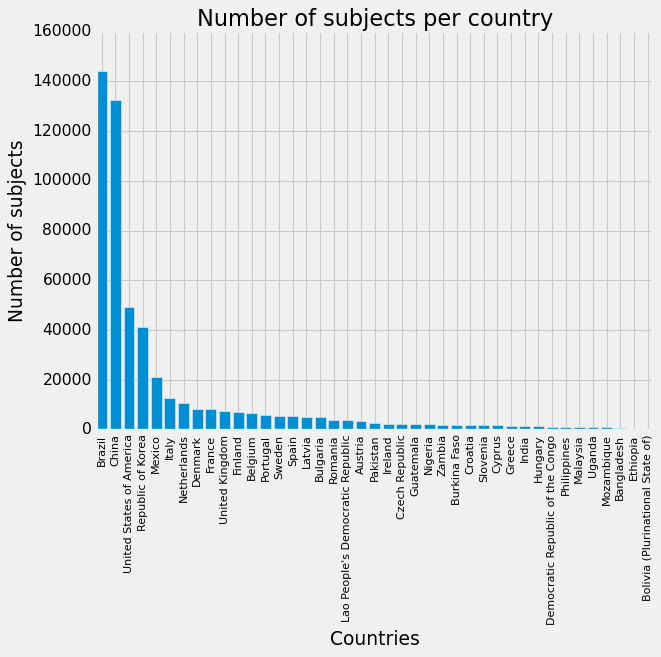

In [1207]:
plt.bar(most_sub_ctry['Country'], most_sub_ctry['Number_of_subjects'])
plt.xticks(most_sub_ctry['Country'], rotation='vertical', size=10)
plt.ylabel("Number of subjects")
plt.xlabel("Countries")
plt.title("Number of subjects per country")
plt.show()

### Na wykresie bardzo dobrze widać jak duża jest dysproporcja co do ilości osob w zależności od kraju. Od razu to wskazuje że wyciągnięte wnioski mogą być zachwiane przez to wiec należy wziać to pod uwagę
### Dla dokładności sprawdzę jak duża jest to różnica i jak rozkłada się to pod względem kontynentów

In [1208]:
top5 = most_sub_ctry['Number_of_subjects'].iloc[0:5].sum()
top5

388340

In [1209]:
rest = most_sub_ctry['Number_of_subjects'].iloc[5:].sum()
rest

134711

In [1210]:
top5/rest

2.882763842596373

### jak widać top5 krajów ma prawie 3 razy wiecej badancyh niż reszta krajów jest to bardzo duża dysporporcja wiec ogolna analiza nie jest aż tak wartościowa 
### dobrze bedzie rozbić to na kontynenty dla łatwiejszej analizy 

In [1211]:
#przypisawanie kontynentu 

In [1212]:
def convert(row):
    cn_code = pc.country_name_to_country_alpha2(row.Country, cn_name_format="default")
    conti_code = pc.country_alpha2_to_continent_code(cn_code)
    return conti_code

### trzeba zamienić nazwy Korei i Bolivii bo w tej package inaczej po prostu te kaje są nnazwane niż w tej bazie danych

In [1213]:
continent = food
continent['Country'] = continent['Country'].replace('Republic of Korea','South Korea')
continent['Country'] = continent['Country'].replace('Bolivia (Plurinational State of)','Bolivia')

/var/folders/bn/4gzz860947dgjqc4dxn4_1_40000gp/T/ipykernel_71433/1263514609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continent['Country'] = continent['Country'].replace('Republic of Korea','South Korea')
/var/folders/bn/4gzz860947dgjqc4dxn4_1_40000gp/T/ipykernel_71433/1263514609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continent['Country'] = continent['Country'].replace('Bolivia (Plurinational State of)','Bolivia')


In [1214]:
continent['ContinentCode'] = continent.apply(convert, axis=1)
continent

/var/folders/bn/4gzz860947dgjqc4dxn4_1_40000gp/T/ipykernel_71433/1236555818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continent['ContinentCode'] = continent.apply(convert, axis=1)


,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects,ContinentCode
0,China,2002,A000G,Oat grain,All,All,All,1157,66172,AS
1,China,2002,A000G,Oat grain,All,All,female,608,33953,AS
2,China,2002,A000G,Oat grain,All,All,male,549,32219,AS
3,China,2002,A000N,Buckwheat,All,All,All,167,66172,AS
4,China,2002,A000N,Buckwheat,All,All,female,82,33953,AS
...,...,...,...,...,...,...,...,...,...,...
272338,India,2015,A0EQN,Soft drinks with minor amounts of fruits or fl...,All,All,female,8,242,AS
272339,India,2015,A0EQN,Soft drinks with minor amounts of fruits or fl...,Adults and Elderly,15-49 years,All,8,242,AS
272340,India,2015,A0F4S,Coconut water,All,All,All,7,242,AS
272341,India,2015,A0F4S,Coconut water,Adults and Elderly,15-49 years,female,7,242,AS


### mamy kody kontynentów wiec niby można by tak to zostawić ale uważam że dużo ładniej i czytelniej jest jak będa też widoczne nazwy kontynentów

In [1215]:
continent['ContinentCode'].unique()

array(['AS', 'EU', 'NA', 'SA', 'AF'], dtype=object)

In [1216]:
conti_names = {	
				'AS':'Asia',
				'EU' : 'Europe',
                'NA' : 'North America',
                'SA' : 'South America',
                'AF' : 'Africa'
                }
continent['Continent'] = continent['ContinentCode'].map(conti_names)
continent

/var/folders/bn/4gzz860947dgjqc4dxn4_1_40000gp/T/ipykernel_71433/2953142121.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continent['Continent'] = continent['ContinentCode'].map(conti_names)


,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects,ContinentCode,Continent
0,China,2002,A000G,Oat grain,All,All,All,1157,66172,AS,Asia
1,China,2002,A000G,Oat grain,All,All,female,608,33953,AS,Asia
2,China,2002,A000G,Oat grain,All,All,male,549,32219,AS,Asia
3,China,2002,A000N,Buckwheat,All,All,All,167,66172,AS,Asia
4,China,2002,A000N,Buckwheat,All,All,female,82,33953,AS,Asia
...,...,...,...,...,...,...,...,...,...,...,...
272338,India,2015,A0EQN,Soft drinks with minor amounts of fruits or fl...,All,All,female,8,242,AS,Asia
272339,India,2015,A0EQN,Soft drinks with minor amounts of fruits or fl...,Adults and Elderly,15-49 years,All,8,242,AS,Asia
272340,India,2015,A0F4S,Coconut water,All,All,All,7,242,AS,Asia
272341,India,2015,A0F4S,Coconut water,Adults and Elderly,15-49 years,female,7,242,AS,Asia


In [1217]:
continent['Continent'].unique()

array(['Asia', 'Europe', 'North America', 'South America', 'Africa'],
      dtype=object)

### jak widać wszystko ładnie się udało wiec moge przypisać to do głownej i ponownie stworzyć dataframes dla każdej płci
### jeszcze zrobienie wizualizacji dla kontynentów przed tym 

In [1218]:
food = continent
food_all = food.loc[food['Gender'] == "All"]
food_con = food_all.groupby(['ContinentCode','Number_of_subjects']).sum().reset_index()
food_con = food_con.groupby(['ContinentCode']).sum().reset_index()
food_con = food_con[['ContinentCode','Number_of_subjects']].sort_values(by='Number_of_subjects', ascending=False)
food_con = food_con.groupby(['ContinentCode']).sum().reset_index()
food_con.sum()

ContinentCode         AFASEUNASA
Number_of_subjects        518734
dtype: object

In [1219]:
most_sub_ctry.sum()

Country               BrazilChinaUnited States of AmericaRepublic of...
Number_of_subjects                                               523051
dtype: object

### niestety ale robiąc to w ten sposob tracę ponad 4000 wyników. Zbyt ważne jest rzeczywiste przedstawienie danych żeby móc sobie pozwolić na taką strate tym bardziej nie wiedząć skąd konkretnie ona pochodzi wiec wykonam to dodając pare kroków wcześniej

In [1220]:
food_ctry = food_all.groupby(['Country','Number_of_subjects']).sum().reset_index()
food_ctry = food_ctry.groupby(['Country']).sum().reset_index()
food_con = food_ctry.groupby(['ContinentCode','Number_of_subjects']).sum().reset_index()
food_con = food_con.groupby(['ContinentCode']).sum().reset_index()
food_con = food_con[['ContinentCode','Number_of_subjects']].sort_values(by='Number_of_subjects', ascending=False)

food_con.sum()

ContinentCode         SASASASASASASASASASASASASASASASASASASASASASASA...
Number_of_subjects                                               523051
dtype: object

### wynik jest dawany dobry ale niestety kontynenty też są zgrupowane wiec muszę odciac wszystko poza pierwszymi literami kodu co pozwoli to dobrze podsumować


In [1221]:
food_con['ContinentCode'] = food_con['ContinentCode'].apply(lambda x: x[0:2])
food_con = food_con.groupby(['ContinentCode']).sum().reset_index().sort_values(by='Number_of_subjects', ascending=False)
food_con

,ContinentCode,Number_of_subjects
1,AS,187248
4,SA,144248
2,EU,108344
3,NA,73032
0,AF,10179


### wszystko poszło dobrze więc mogę teraz wizualizować tylk jeszcze zamienie kody na nazwy kontynentów 

In [1222]:
food_con['Continent'] = food_con['ContinentCode'].map(conti_names)
food_con

,ContinentCode,Number_of_subjects,Continent
1,AS,187248,Asia
4,SA,144248,South America
2,EU,108344,Europe
3,NA,73032,North America
0,AF,10179,Africa


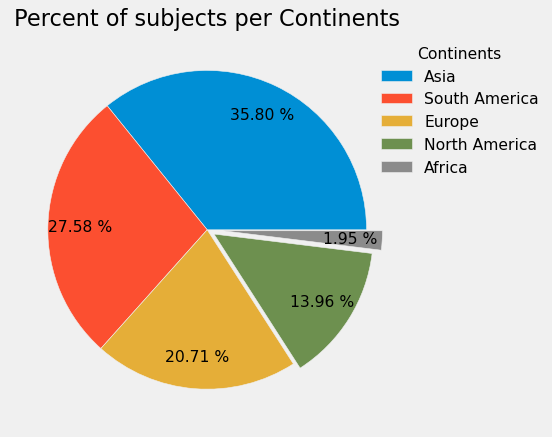

In [1223]:
labels = food_con['Continent']
plt.pie(food_con['Number_of_subjects'], autopct = '%.2f %%', explode=(0,0,0,.05,.1), pctdistance = (0.8))
plt.legend(labels, title='Continents', loc="center left", bbox_to_anchor=(0.9, 0.8), fontsize="14")
plt.title('Percent of subjects per Continents')
plt.show()

### Na tym wykresie widać natomiast że nie jest aż tak nie jest aż tak złe rozłożenie badanych. Afryka  wiadomo najgorzej wypada ale jednak reszta kontynentów względnie blisko siebie sie znajduje. Pozwala to jednak wyznaczyć ogólne trendy na świecie co do spożywanych produktów. gdyby nie sprawdzić tego jak wygląda rozłożenie na kontynenty łatwo by można uznać że nie jest warte robienie globalnej analizy tylko dokładnej dla kraju lub kontynentu
### teraz natomiast zajmę sie takim przygotowanie danych żeby móc wygodnie przeanalizować najbardziej spożywane produkty ponieważ nie wszędzie jest AgeClass dla wszystkich jako podsumowanie wiec samemu będę to musiał zrobić

In [1224]:
it_oat_all = food_all.loc[food_all['FoodName'] == "Oat grain"]
it_oat_all = it_oat_all.loc[it_oat_all['Country'] == "Italy"]
it_oat_all

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects,ContinentCode,Continent
212154,Italy,2006,A000G,Oat grain,All,All,All,4,3307,EU,Europe
212169,Italy,2006,A000G,Oat grain,Infants and Toddlers,0-35 months,All,0,36,EU,Europe
212170,Italy,2006,A000G,Oat grain,Children and Adolescents,3-5 years,All,0,67,EU,Europe
212171,Italy,2006,A000G,Oat grain,Children and Adolescents,6-14 years,All,0,284,EU,Europe
212172,Italy,2006,A000G,Oat grain,Adults and Elderly,15-49 years,All,2,1603,EU,Europe
212173,Italy,2006,A000G,Oat grain,Adults and Elderly,50-74 years,All,2,1089,EU,Europe
212174,Italy,2006,A000G,Oat grain,Adults and Elderly,>75 years,All,0,228,EU,Europe


In [1225]:
it_oat_all.groupby(['Country','FoodName']).sum().reset_index()


,Country,FoodName,Year,FoodCode,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects,ContinentCode,Continent
0,Italy,Oat grain,14042,A000GA000GA000GA000GA000GA000GA000G,AllInfants and ToddlersChildren and Adolescent...,All0-35 months3-5 years6-14 years15-49 years50...,AllAllAllAllAllAllAll,8,6614,EUEUEUEUEUEUEU,EuropeEuropeEuropeEuropeEuropeEuropeEurope


### chyba najlepiej bedzie dropnąć rzad w którym jest SourceAgeClass All i potem podsumować 

In [1226]:
# create a Boolean mask for the rows to remove
mask = it_oat_all['AgeClass'] == 'All'

# select all rows except the ones that contain 'Coca Cola'
it_oat_all = it_oat_all[~mask]
it_oat_all

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects,ContinentCode,Continent
212169,Italy,2006,A000G,Oat grain,Infants and Toddlers,0-35 months,All,0,36,EU,Europe
212170,Italy,2006,A000G,Oat grain,Children and Adolescents,3-5 years,All,0,67,EU,Europe
212171,Italy,2006,A000G,Oat grain,Children and Adolescents,6-14 years,All,0,284,EU,Europe
212172,Italy,2006,A000G,Oat grain,Adults and Elderly,15-49 years,All,2,1603,EU,Europe
212173,Italy,2006,A000G,Oat grain,Adults and Elderly,50-74 years,All,2,1089,EU,Europe
212174,Italy,2006,A000G,Oat grain,Adults and Elderly,>75 years,All,0,228,EU,Europe


### widać że tam etoda zadziałała wiec muszę wykonać to na podstawowej dataframe i potem podzielić na płcie

In [1262]:
mask = food['AgeClass']== 'All'
food = food[~mask]

In [1263]:
food_all = food.loc[food['Gender'] == "All"]
food_fem = food.loc[food['Gender'] == "female"]
food_men = food.loc[food['Gender'] == "male"]

In [1272]:
most_consumed_all = food_all.groupby(['FoodName']).sum().reset_index().sort_values(by='Number_of_consumers', ascending=False)
most_consumed_fem = food_fem.groupby(['FoodName']).sum().reset_index().sort_values(by='Number_of_consumers', ascending=False)
most_consumed_men = food_men.groupby(['FoodName']).sum().reset_index().sort_values(by='Number_of_consumers', ascending=False)
test[['FoodName','Number_of_consumers']].head(10)

,FoodName,Number_of_consumers
1,(All Cereals),142214
2811,"Wheat bread and rolls, white (refined flour)",135436
1836,Onions,112344
2249,"Rice grain, polished",105857
1997,Pig fresh meat,104118
2652,Tap water,92605
2092,Potatoes,89154
375,Carrots,87843
1126,Garlic,84415
2243,Rice grain,82719


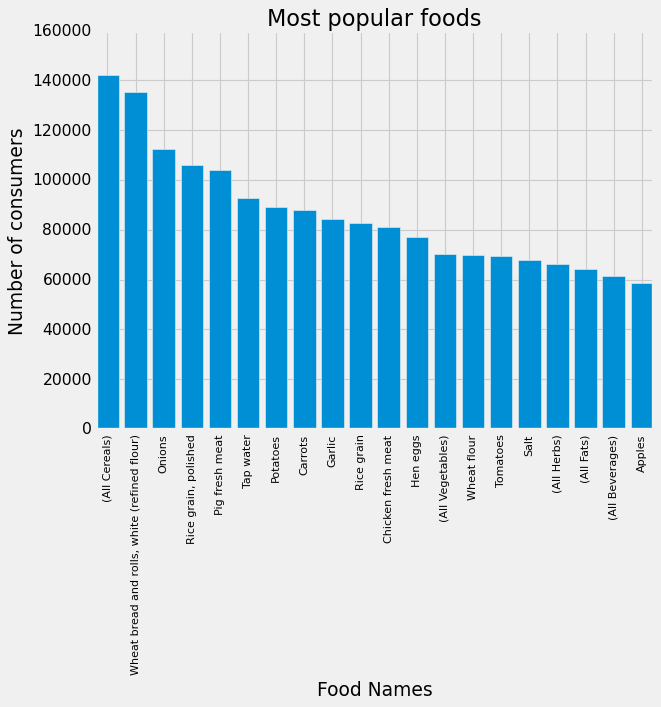

In [1283]:
show_most_consumed_all = most_consumed_all.head(20)
plt.bar(show_most_consumed_all['FoodName'], show_most_consumed_all['Number_of_consumers'])
plt.xticks(show_most_consumed_all['FoodName'], rotation='vertical', size=10)
plt.ylabel("Number of consumers")
plt.xlabel("Food Names")
plt.title("Most popular foods")
plt.show()

### Na wykresie widzimy że najpopularniejszym jedzeniem na świecie są płatki śniadaniowe. Wiadomo że to zbiera razem wszystkie rodzaje płatków ale nadal jest to niesamowite ze przebija to nawet najpopularniejsze warzywa albo zioła które ludzie wydawałoby się dodają do wszystkiego takie jak np cebula, czosnek. na drugim miejscu białe pieczywo te dwa produkty wskazują że ludzie bardzo lubią proste produkty łatwe i szybkie w przygotowaniu w szczególnosci jeżeli chodzi o śniadania bo jednak to z tym głownie kojarzą sie płatki i pieczywo. 
### Na szczęście później dzieje sie lepiej. cebula, ryż (nadal biały łuskany ale jednak już jest to produkt z wiekszą ilością aminokwasów i węglowodanów), co ciekawe wieprzowina jest na 5 miejscu, zazwyczaj wydaje sie że to kurczak króluje jako mięso a jendak takie myślenie jest błędne. 

### Bardzo ciekawą różnicą 

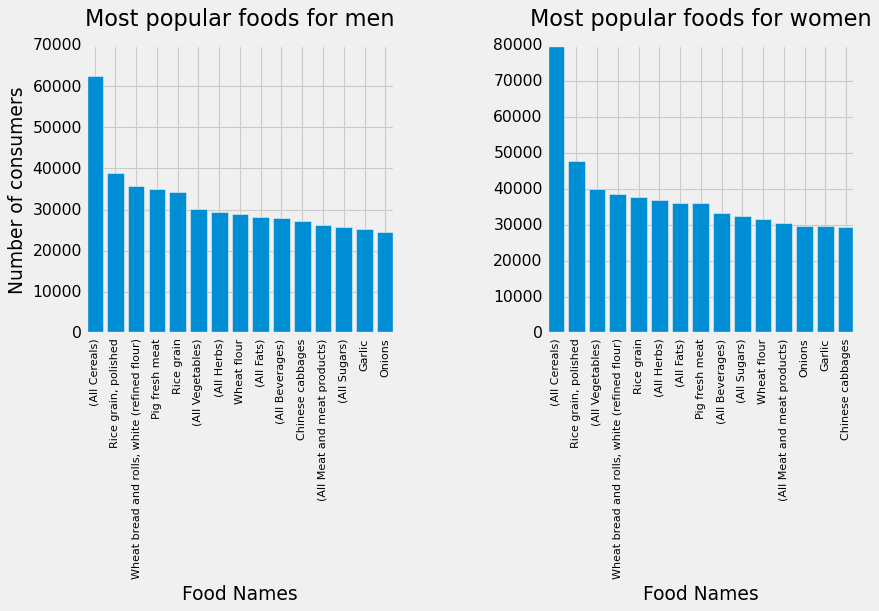

In [1497]:
show_most_consumed_men = most_consumed_men.head(15)
show_most_consumed_fem = most_consumed_fem.head(15)
plt.subplot(1, 2, 1)
plt.bar(show_most_consumed_men['FoodName'], show_most_consumed_men['Number_of_consumers'])
plt.xticks(show_most_consumed_men['FoodName'], rotation='vertical', size=10)
plt.ylabel("Number of consumers")
plt.xlabel("Food Names")
plt.title("Most popular foods for men", y=1.05)

plt.subplot(1, 2, 2)
plt.bar(show_most_consumed_fem['FoodName'], show_most_consumed_fem['Number_of_consumers'])
plt.xticks(show_most_consumed_fem['FoodName'], rotation='vertical', size=10)
plt.xlabel("Food Names")
plt.title("Most popular foods for women", y=1.05)

plt.subplots_adjust(left=0.1,
                    bottom=0.5,
                    right=1.3,
                    top=1.1,
                    wspace=0.5,
                    hspace=1)
plt.show()

In [ ]:
#musze podzielić ilość kobiet która je płatki na całkowita ilość kobiet

In [1495]:
show_most_consumed_fem[:1]['Number_of_consumers']/food_fem['Number_of_subjects'].unique().sum()*100


1   65.55
Name: Number_of_consumers, dtype: float64

In [1496]:
show_most_consumed_men[:1]['Number_of_consumers']/food_men['Number_of_subjects'].unique().sum()*100

1   64.96
Name: Number_of_consumers, dtype: float64

### Prównuja konsumpcje mężczyzn i kobiet dwie rzeczy najbardziej rzucają mi sie w oczy, pierwsza że płatki u obu płci są na pierwszym miejscu chociaż co ciekawe kobiety jedza o 0.59 pkt% wiecej płatków od mężczyzn. druga że u kobiet warzywa są na 3 miejscu a u mężczyzn na 6, najprawdopodobniej wynika to z tego że kobiety prędzej są na diecie wegeteriańskiej lub wegańskiej plus ogolnie tendencje wskazują żę społecznie przyjmuje sie że mężczyźni wiecej miesa mogą jesć na co wskazuje to badanie https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3490048/ , ale dla dokładnej analizy tego zjawiska przydałoby sie wiecej danych ponieważ może to wynikać np że organizm mężczyzn potrzebuje wiecej mięsa np przez kreatynę które ono dostarcza ale skupiajmy sie na faktach. widać tu tendencje że kobiety jedzą wiecej warzyw. Również mięso wieprzowe u mężczyzn jest na wyższym miejscu. 
### Na podstawie tego co piszę można by wywnioskować że kobiety mają zdrowszą diete ale jednak nie można tak od razu zrobić, ponieważ po pierwsze te płatki których jednak wiecej spożywają ale również to że do top10 u kobiet załapuje sie cukier a u mężczyzn nie oraz żę tłuszcze u kobiet zajmują wyższe miejce. Na podstawie tego widać że nie jest to takie proste, isteniej możliwość że z powodu trzymania zdrowszej diety jeżeli chodzi o np obiady to w przypadku przekąsek a w szczególości tych słodkich i tłustych to kobiety ich wiecej spożywają. Może to wskazywać na prostą zależność że ludzie naturalnie szukają równowagi. 
### jeżeli chodzi o wnioski które by pomogły w tworzeniu odpowiedniego menu do restauracji to można do tego podejśc dwujako, ludzie lubią jeść proste i szybkie posiłki oraz rzecyz które znają dobrze, tylko pytanie czy w ludzie do restauracji chodzą po to żeby jeść to co zawsze? uważam że to zależy, jeżeli chodzi o takie miejsca jak bary mleczne, kuchnie domowe czy nawet kebaby to dobrze żeby były tam opcje które ludzie znają, ale natwomiast w przypadku restauracji wyższej klasy dużym plusem może być własnie wyjście z tej grupy najbardziej popularnych produktów, ludzie lubią odkrywać nowe rzeczy i może to pozostawić to na nich duże wrażenie, w końcu nie będą płacić dużo pieniędzy za coś co mogą zrobić w domu, własnie te rzeczy które są nietypowe, których nie zna wiekszość lub nie jest do nich przywyczajona mogą wywowałać zachwyt. do analizy tego dokładnie trzeba by użyć innych danych ale można takie wnioski wyciągnąć z tych wykresów

### jak widać nawet w bazach danych branych z źródeł które wydawały by się mieć je bardzo dobrze wyczyszczone i bez błędów nadal one mogą występować i nie nalezy brać za pewnik że wszystko bedzie dobrze, samemu należy to sprawdzać zawsze bo błędy mogą występować 